In [140]:
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [141]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [142]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [143]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


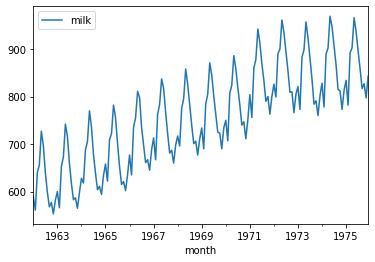

In [144]:
milk.plot()

In [145]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk.milk)

(-1.3038115874221312,
 0.6274267086030308,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [146]:
milk.milk.sum()

126791

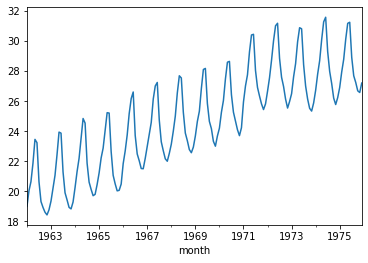

In [147]:
milk['daily'] = milk.milk/milk.index.days_in_month
milk.daily.plot()

In [163]:
diff_season = (milk.daily - milk.daily.shift(12)).dropna()
new_milk =(diff_season - diff_season.shift(1)).dropna()

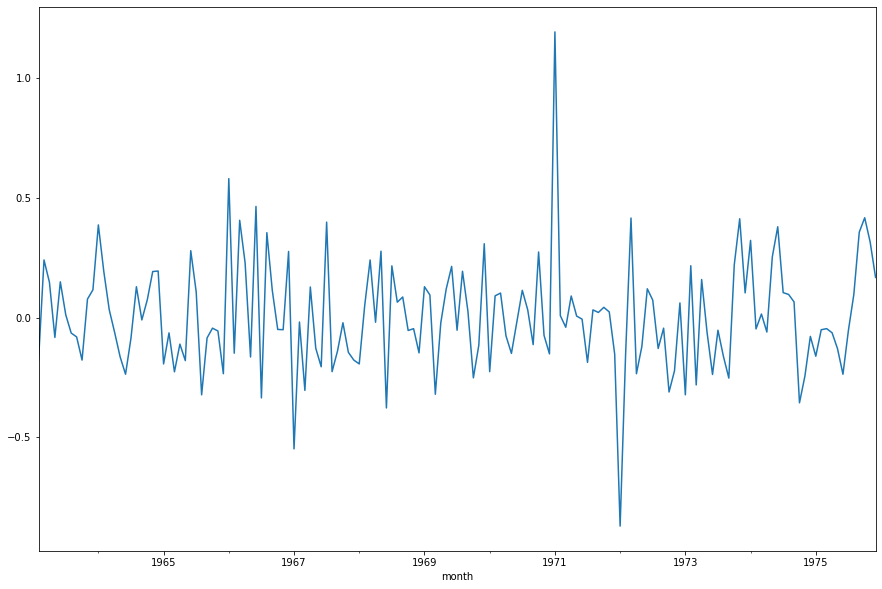

In [164]:
new_milk.plot()

Критерий Дики-Фуллера: p=0.000002


<Figure size 1080x720 with 0 Axes>

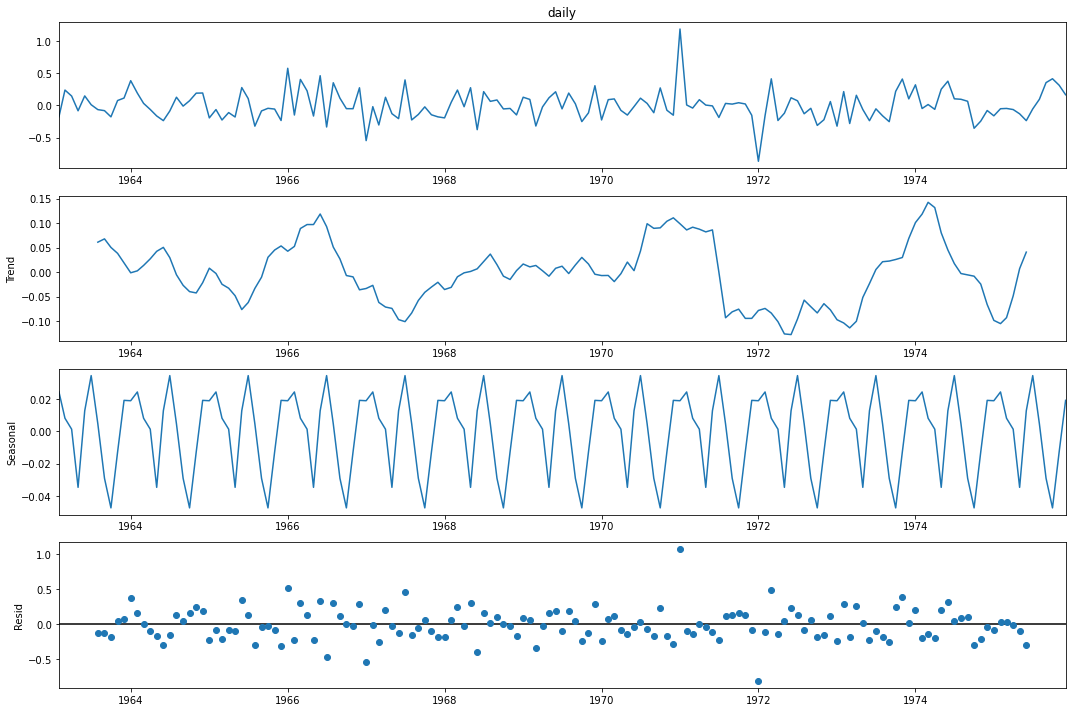

In [165]:
pylab.figure(figsize(15,10))
sm.tsa.seasonal_decompose(new_milk).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(new_milk)[1])

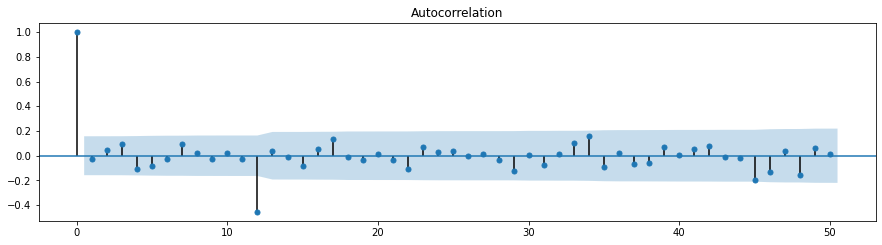

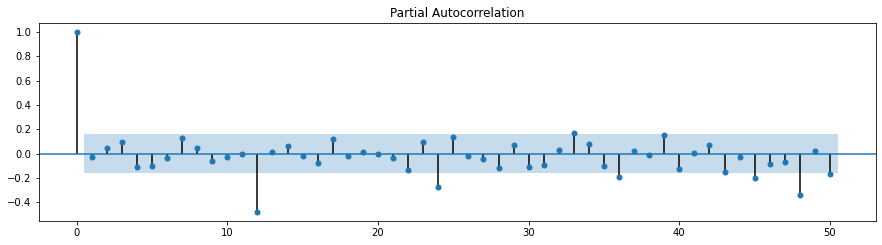

In [166]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(new_milk.values.squeeze(), lags=50, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(new_milk.values.squeeze(), lags=50, ax=ax)
pylab.show()